<a href="https://colab.research.google.com/github/finfrierson/data-science-fundamentals/blob/main/Fin_FrieU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "preliz[full,notebook]"
import preliz as pz
import numpy as np
import pymc as pm
import arviz as az
#Importing programs

My data is looking at the chance of getting the 5 star character I want from a limited banner in genshin impact. There are 2 options when you get a 5 star character; either you get the one you want, or another one from a random assortment that will be grouped together. I will consider the times you get the character you want to be won, and any of the other characters to be lost. Like my data set, I will not be considering that you get a garunteed win after you lose once, I will just be considering when there is a possibility of both losing and winning.

<Axes: >

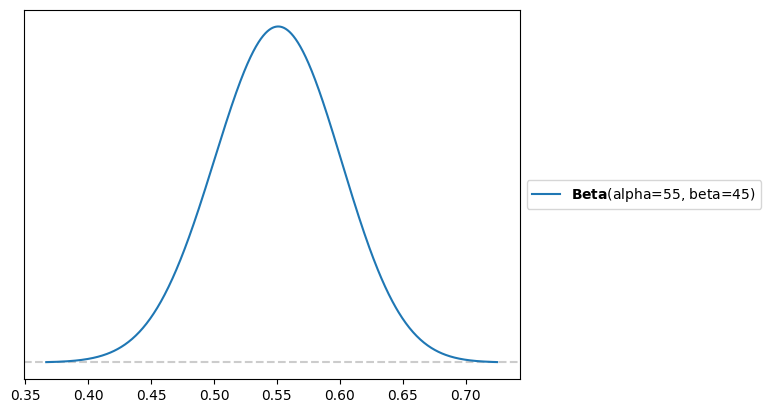

In [ ]:
a=55
b=45
beta = pz.Beta(alpha=a,beta=b)
beta.plot_pdf()
#Because of past assumption, I am using a 55-45 split.

My data is taken from a website called paimon.moe, which collected data from tens of thousands of players, totalling 24519 wins, and 22363 losses, which is 46882 total chances. This data was retreived on september 9th at around 10:30 am.

In [ ]:
#Setting up wins and losses in a variable
w = 24519
l = 22363
#setting up for a later model using a combo of prior data and actual data
alpha = w+a
beta = l+b
combined_model = pz.Beta(alpha=alpha, beta=beta)

<Axes: >

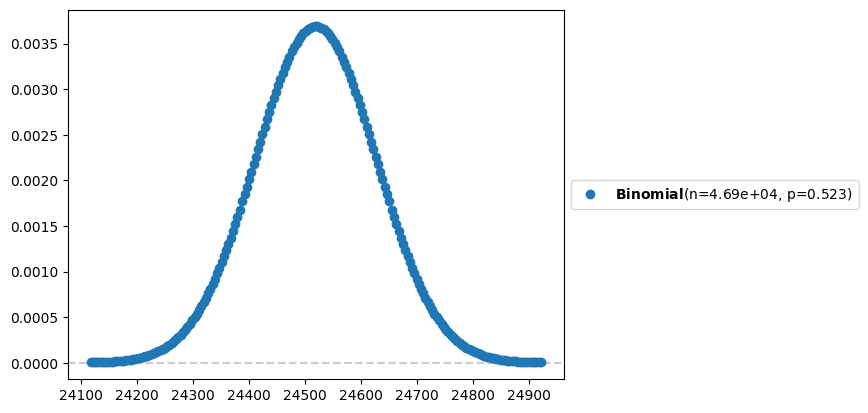

In [ ]:
#Next up is a binomial distribution based on the data from paimon.moe
pz.Binomial(n=w+l,p=w/(w+l)).plot_pdf()

In [ ]:
wins = np.repeat(1, w)
losses = np.repeat(0, l)
data = np.concatenate( [wins,losses] )
#This combines the wins and losses into one set of data to use

In [ ]:
#Creaating the model
with pm.Model() as genshin_pulling_model:
  #First defining the prior
  θ = pm.Beta('θ' , alpha = 55. , beta = 45.)

  #Next defining likelihood
  y = pm.Bernoulli('y', p = θ, observed = data)

  #Sampling from our posterior to get more data, I chose 10000 because I have a lot of data
  sample_data = pm.sample(10000)


<Axes: title={'center': 'θ'}>

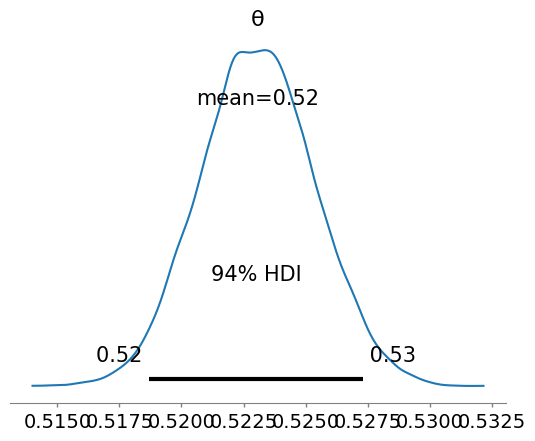

In [ ]:
az.plot_posterior(sample_data)
#Visualization of the 10000 data points for a pymc model

This model shows that the mean of the data is around 5.2. The data is highly centered around one spot, but it was at a different percent than I originally thought.

<Axes: title={'center': 'θ'}>

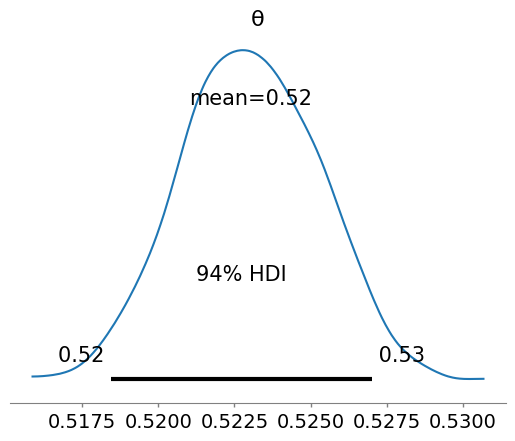

In [ ]:
az.plot_posterior( {'θ' : combined_model.rvs(1000)} )
#Here is a display of 1000 values from an analytic model.

Both models show similar results, with a 5.2 mean, but the pymc model presents a more tightly grouped graph. The following code shows predictions of winning or losing in the future.

In [ ]:
pm.sample_posterior_predictive(sample_data, model=genshin_pulling_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

In [ ]:
win_or_lose = az.extract(sample_data, group="posterior_predictive")
win_or_lose.sel(sample=0).sel(draw=0).y.to_series().values

array([1, 0, 0, ..., 1, 0, 0])

To conclude, the mean win chance sits around 52%, with a very small range in the distribution. Using the predictive model I can predict that I would win once then lose twice.